<a href="https://colab.research.google.com/github/azzhrkml/PortofolioAzzahra/blob/main/Summaryall_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ulcerative colitis (UC) is an inflammatory bowel disease in humans resulting from the improper activation of the intestinal mucosa, which is triggered by a combination of genetic, immunological, and environmental factors. Unfortunately, despite the availability of numerous therapeutic alternatives depending on the severity of the disease, UC is still considered an incurable condition. According to the United States Census data in 2016, an estimated 451,776 adults in the United States were living with ulcerative colitis. The diagnosis of UC is made through clinical symptoms along with stool examination, colonoscopy, and biopsy to confirm colitis and rule out infection. However, early detection with endoscopy and histology does not always accurately diagnose ulcerative colitis. Therefore, one alternative method that can be used to detect ulcerative colitis is by implementing machine learning on gene expression data. This study aims to identify features in the design of a predictive model for ulcerative colitis using the cuckoo search algorithm and support vector machine method, with gene expression data as its basis. To enhance the model's results, hyperparameter tuning was used with three kernels, i.e. RBF, polynomial, and linear. Based on our results, the performance of the SVM method with a Polynomial kernel was the best, achieving an accuracy of 0.78 and an F1 score of 0.82.

In [ ]:
!pip install joblib
!pip install matplotlib seaborn scikit-learn pandas numpy

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import joblib
import matplotlib.pyplot as plt


drive.mount("/content/drive", force_remount=True)
path = '/content/drive/MyDrive/TA_Azzahra/DATA'

Mounted at /content/drive


In [ ]:
x_train = pd.read_csv("{}/dt_x.csv".format(path))
y_train = pd.read_csv("{}/dt_y.csv".format(path))

In [ ]:
x_train

,129,240,304,664,702,777,795,961,1010,1056,...,43341,43423,43464,43505,43549,43622,44021,44100,44105,44201
0,0.031030,-0.309640,0.77731,0.231890,-0.50310,0.191880,0.54236,0.48063,0.185020,1.204200,...,1.11000,1.10990,0.051603,0.132420,0.035148,-0.60026,0.707670,-0.87508,0.072701,0.44352
1,0.712770,0.196760,1.47720,0.020136,0.56443,-0.271690,1.40660,0.26580,0.356950,0.456470,...,1.08200,0.56856,0.033112,-0.518730,0.292330,-0.99087,0.816430,-1.31650,0.657260,0.80646
2,0.911620,0.969350,0.89868,0.468160,-0.54141,-0.030505,1.62570,0.75893,0.555940,1.080600,...,1.32170,0.98750,0.074797,0.060367,0.235170,-1.12880,0.999210,-1.04560,0.597840,0.98189
3,1.561000,-0.293250,1.17280,1.093800,-0.16071,-0.659560,2.00000,0.79977,0.024226,0.797560,...,1.46780,0.98572,0.209010,-0.561080,0.755200,-1.35760,1.179400,-1.09250,1.129800,1.13670
4,0.274160,-0.048071,1.05600,0.258620,-0.45895,-0.209240,0.79151,0.62129,-0.433820,0.412060,...,1.39810,0.71127,-0.072517,0.188970,0.083211,-1.11000,1.276400,-1.01980,0.485920,0.58719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.954550,-0.465490,0.70845,0.952710,-0.51128,0.003965,1.44370,1.15490,-0.246660,1.474800,...,1.16770,1.12770,-0.014793,0.750350,0.340310,-0.93739,1.349800,-1.18830,0.659910,0.44499
157,0.377600,-0.483800,1.16720,0.284080,-0.50875,-0.403670,0.88837,0.11207,0.215570,0.028451,...,1.38280,0.62292,0.102270,-0.657480,0.071943,-0.98590,0.303220,-1.24380,0.324880,0.70666
158,0.239640,0.316670,0.46990,0.494320,-0.56032,0.611690,0.99581,0.98923,0.447440,1.454700,...,1.40820,1.48980,-0.009628,0.397260,-0.038596,-0.70034,1.368500,-0.99489,0.407040,-0.47884
159,0.456980,-0.213950,0.21023,0.601800,-0.40921,0.546690,1.05890,1.00340,0.173710,1.369000,...,0.83825,1.42930,0.009099,0.620950,0.076837,-0.43626,0.059921,-1.28770,0.426790,0.45349


In [ ]:
dttest = pd.read_csv("{}/data_test.csv".format(path))
x_test = dttest.drop('Type', axis = 1)
x_test

,9,17,18,24,25,27,29,31,36,39,...,44263,44264,44269,44273,44281,44282,44283,44284,44287,44290
0,0.485860,0.039411,0.73720,0.159040,-0.73665,-0.33229,-0.73161,0.072956,-0.411650,0.511190,...,-0.059977,-0.471530,-0.132810,-0.452680,-0.053974,-0.35655,-0.390680,0.435180,0.939170,-1.3814
1,-0.050329,0.092736,1.29950,0.033134,-0.24395,-0.39742,-0.54018,-0.019224,-0.342670,0.043284,...,0.147390,0.110650,-0.146010,0.322380,-0.132210,-0.61766,-0.112100,0.252770,0.203530,-1.7025
2,0.027231,0.002676,1.04280,0.034410,-0.14699,-0.33175,-0.23883,-0.029982,-0.164900,0.016211,...,-0.017864,0.106320,-0.261560,0.428380,0.166420,-0.51541,0.087317,0.112740,0.077668,-1.4032
3,0.207210,0.027411,1.04940,0.188050,-0.70080,-0.16740,-0.76334,0.189330,-0.356470,0.520040,...,0.008282,-0.323780,-0.042951,-0.439250,0.355940,-0.51542,-0.520470,0.517100,0.562190,-1.6176
4,-0.132980,-0.044568,1.17680,0.026042,-0.29553,-0.39380,-0.21946,-0.053271,-0.151880,-0.018564,...,-0.065116,0.075382,-0.286360,0.225030,0.038331,-0.54455,-0.089003,0.173550,0.148040,-1.2696
5,-0.029925,0.035386,1.16730,0.103720,-0.18258,-0.59452,-0.47984,-0.023870,-0.489010,-0.002163,...,0.163830,0.013650,-0.248290,0.211880,-0.048716,-0.68719,-0.134610,0.217730,0.134800,-1.5869
6,0.047490,0.001129,1.00250,0.128980,-0.45584,-0.52528,-0.51740,0.168910,-0.500480,0.251400,...,0.083548,-0.109410,-0.117860,0.108450,-0.087541,-0.50900,-0.138760,0.285110,0.148660,-1.4835
7,0.029167,-0.086580,1.14560,0.125730,-0.34166,-0.62274,-0.28675,0.039500,-0.573080,0.272750,...,0.087197,0.022176,-0.099212,0.312710,-0.065901,-0.61109,-0.218930,0.289610,0.085678,-1.5142
8,-0.022607,-0.072589,1.10580,0.077694,-0.22923,0.31019,-0.11499,0.015565,-0.517480,0.133830,...,-0.171920,-0.181030,-0.301030,0.320190,-0.178240,-0.59713,-0.128150,0.184870,-0.072274,-1.6120
9,0.085572,-0.004968,1.27580,0.031919,-0.25908,-0.42839,-0.54052,0.071580,-0.313570,0.299000,...,0.195200,-0.050587,-0.183000,0.141570,-0.027512,-0.56815,-0.101670,0.279560,0.219670,-1.7494


In [ ]:
y_test = dttest.iloc[:,[-1]]
y_test

,Type
0,1
1,1
2,0
3,1
4,1
5,0
6,0
7,1
8,1
9,1


In [ ]:
y_test = np.array(y_test)
y_test

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1]])

In [ ]:
y_train = np.array(y_train)
y_train

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

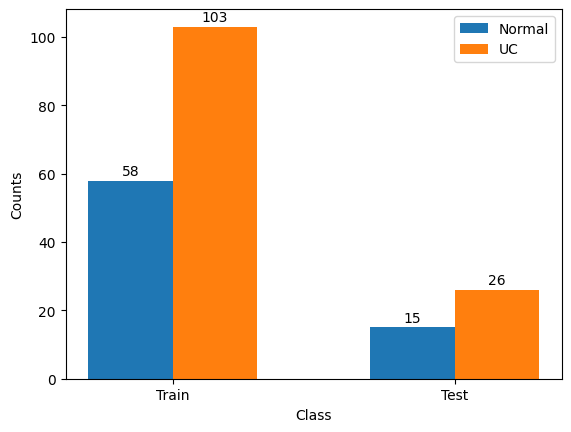

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example values for y_train and y_test to match the desired counts
# Replace these arrays with your actual data if needed
y_train = np.array([0] * 58 + [1] * 15)  # 58 Normal, 15 UC
y_test = np.array([0] * 103 + [1] * 26)  # 103 Normal, 26 UC

# Menghitung jumlah untuk masing-masing kelas
normal_train = np.sum(y_train == 0)
uc_train = np.sum(y_train == 1)
normal_test = np.sum(y_test == 0)
uc_test = np.sum(y_test == 1)

# Set posisi
position = np.arange(2)
width = 0.30  # Lebar batang

# Plotting grafik bar
fig, ax = plt.subplots()

# Plot data training
train_bars = ax.bar(position - width/2, [normal_train, uc_train], width, label='Normal')

# Plot data testing
test_bars = ax.bar(position + width/2, [normal_test, uc_test], width, label='UC')

# Menambahkan label data di atas batang
ax.bar_label(train_bars, padding=2)
ax.bar_label(test_bars, padding=2)

# Mengatur label dan judul
ax.set_ylabel('Counts')
ax.set_xlabel('Class')
ax.set_xticks(position)
ax.set_xticklabels(['Train', 'Test'])  # Label ini harus merepresentasikan kelas yang sesuai
ax.legend()

plt.show()


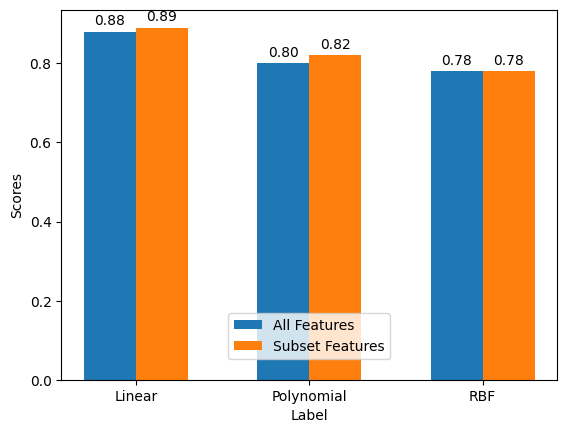

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# FEATURES SELECTION
All_Features_accuracyLinear = 0.88
Subset_Features_accuracyLinear =  0.89
All_Features_accuracyPolynomial = 0.80  # Ensuring this is 0.80
Subset_Features_accuracyPolynomial = 0.82
All_Features_accuracyRBF = 0.78
Subset_Features_accuracyRBF = 0.78

# set position
position = np.arange(3)
width = 0.30  # Adjusted width for better visualization

# plotting the bar chart
fig, ax = plt.subplots()

random_bars = ax.bar(position, [All_Features_accuracyLinear, All_Features_accuracyPolynomial, All_Features_accuracyRBF], width, label='All Features')
ada_bars = ax.bar(position + width, [Subset_Features_accuracyLinear, Subset_Features_accuracyPolynomial, Subset_Features_accuracyRBF], width, label='Subset Features')

# adding the data labels above the bars
ax.bar_label(random_bars, padding=3, fmt='%.2f')
ax.bar_label(ada_bars, padding=3, fmt='%.2f')

# setting the label and title
ax.set_ylabel('Scores')
ax.set_xlabel('Label')
ax.set_xticks(position + width / 2)  # Centering the x-ticks between bars
ax.set_xticklabels(['Linear', 'Polynomial', 'RBF'])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2), ncol=1)  # Placing legend below the chart

plt.show()


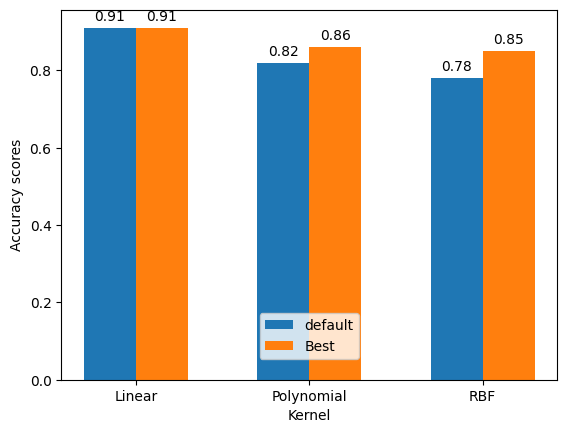

In [ ]:
#MENAMPILKAN AKURASI HYPERPARAM
import numpy as np
import matplotlib.pyplot as plt

parameter_defaultLinear = 0.91
parameter_bestLinear = 0.91
parameter_defaulPoly = 0.82
parameter_bestPoly = 0.86
parameter_defaulRBF = 0.78
parameter_bestRBF = 0.85

# set position
position = np.arange(3)
width = 0.30  # Adjusted width for better visualization

# plotting the bar chart
fig, ax = plt.subplots()

random_bars = ax.bar(position, [parameter_defaultLinear, parameter_defaulPoly, parameter_defaulRBF], width, label='default')
ada_bars = ax.bar(position + width, [parameter_bestLinear, parameter_bestPoly, parameter_bestRBF], width, label='Best')

# adding the data labels above the bars
ax.bar_label(random_bars, padding=3)
ax.bar_label(ada_bars, padding=3)

# setting the label and title
ax.set_ylabel('Accuracy scores')
ax.set_xlabel('Kernel')
ax.set_xticks(position + width / 2)  # Centering the x-ticks between bars
ax.set_xticklabels(['Linear', 'Polynomial', 'RBF'])


ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2), ncol=1)  # Placing legend below the chart

plt.show()


In [ ]:
convergence_linear = joblib.load("{}/convergence_dataLinear.pkl".format(path))
convergence_polynomial = joblib.load("{}/convergence_dataPolynomial.pkl".format(path))
convergence_RBF = joblib.load("{}/convergence_dataRBF.pkl".format(path))

In [ ]:
convergence_linear1 = convergence_linear[0]
convergence_linear2 = convergence_linear[1]
convergence_polynomial1= convergence_polynomial[0]
convergence_polynomial2 = convergence_polynomial[1]
convergence_RBF1  = convergence_RBF[0]
convergence_RBF2 = convergence_RBF[1]

In [ ]:
# Calculating the standard deviation
std_deviation = np.std(convergence_linear2)

print(f"The standard deviation is: {std_deviation}")

The standard deviation is: 0.008935415152773159


In [ ]:
# Calculating the standard deviation
std_deviation = np.std(convergence_polynomial2)

print(f"The standard deviation is: {std_deviation}")

The standard deviation is: 0.006114517181563062


In [ ]:
# Calculating the standard deviation
std_deviation = np.std(convergence_RBF[1])

print(f"The standard deviation is: {std_deviation}")

The standard deviation is: 0.0008889795872094931
